In [31]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# import data
economicofscale = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Economy%20of%20Scale.csv')

In [33]:
economicofscale.head()

,Units,Cost
0,1.0,95.1
1,1.2,96.5
2,1.2,73.7
3,1.2,95.6
4,1.3,98.8


In [34]:
economicofscale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Units   1000 non-null   float64
 1   Cost    1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [35]:
economicofscale.describe()

,Units,Cost
count,1000.000000,1000.000000
mean,4.471500,40.053200
std,1.336437,10.596183
min,1.000000,20.000000
25%,3.600000,32.900000
50%,4.400000,38.300000
75%,5.300000,44.525000
max,10.000000,100.000000


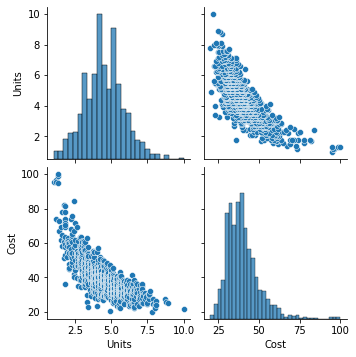

In [36]:
sns.pairplot(economicofscale)

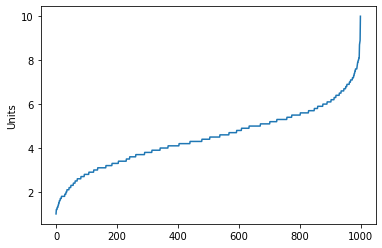

In [37]:
sns.lineplot(data=economicofscale['Units'])

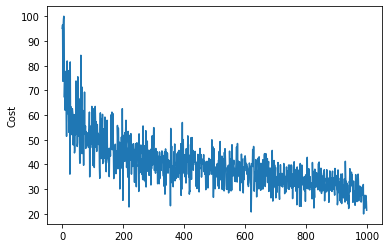

In [38]:
sns.lineplot(data=economicofscale['Cost'])

In [39]:
# define target and features
y = economicofscale['Cost']
X = economicofscale[['Units']]

In [40]:
X.shape

(1000, 1)

In [41]:
y.shape

(1000,)

In [42]:
# split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state =2529)

# **Linear Model**

In [43]:
# selct model
from sklearn.linear_model import LinearRegression
regmodel = LinearRegression()

In [44]:
regmodel.fit(X_train, y_train)

LinearRegression()

In [45]:
regmodel.intercept_

65.82998506163781

In [46]:
regmodel.coef_

array([-5.77565251])

Text(0.5, 1.0, 'Unit Cost vs. Number of Units [in Millions](Training dataset)')

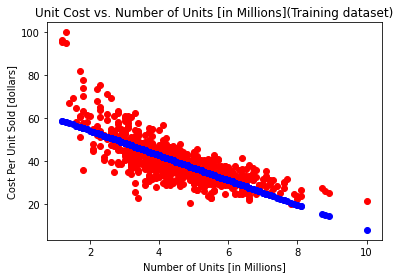

In [90]:
fig,ax = plt.subplots()
ax.scatter(X_train, y_train, color = 'red')
ax.scatter(X_train, regmodel.predict(X_train), color = 'blue')
ax.set_ylabel('Cost Per Unit Sold [dollars]')
ax.set_xlabel('Number of Units [in Millions]')
ax.set_title('Unit Cost vs. Number of Units [in Millions](Training dataset)')

# **Polynomial Model**

In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [74]:
poly_regressor = PolynomialFeatures(degree=2)

In [75]:
# Transform the matrix of features X into a multi array of features X_Columns 
# which contains the original features and their associated polynomial terms 
X_poly = poly_regressor.fit_transform(X)

In [76]:
print(X_poly)

[[  1.     1.     1.  ]
 [  1.     1.2    1.44]
 [  1.     1.2    1.44]
 ...
 [  1.     8.8   77.44]
 [  1.     8.9   79.21]
 [  1.    10.   100.  ]]


In [77]:
X_poly.shape

(1000, 3)

In [78]:
Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_poly,y,random_state =2529)

In [79]:
regpoly = LinearRegression()

In [80]:
regpoly.fit(Xp_train, yp_train)

LinearRegression()

In [81]:
regpoly.intercept_

87.06106955251003

In [82]:
regpoly.coef_

array([  0.        , -15.6376502 ,   1.05169852])

Text(0.5, 1.0, 'Unit Cost vs. Number of Units [in Millions](Training dataset)')

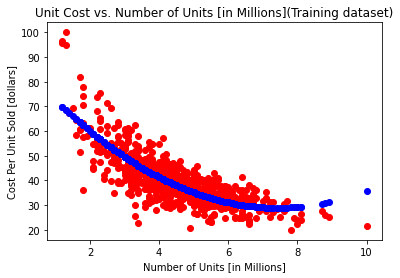

In [89]:
fig,ax = plt.subplots()
ax.scatter(X_train, y_train, color = 'red')
ax.scatter(X_train, regpoly.predict(Xp_train), color = 'blue')
ax.set_ylabel('Cost Per Unit Sold [dollars]')
ax.set_xlabel('Number of Units [in Millions]')
ax.set_title('Unit Cost vs. Number of Units [in Millions](Training dataset)')

In [69]:
# predict
yp_pred= regpoly.predict(Xp_test)

In [70]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

In [71]:
mean_absolute_percentage_error(yp_test, yp_pred)

0.11173855327066419

In [72]:
r2_score(yp_test, yp_pred)

0.7488001876464128